# Exploratory Data Analysis

In [1]:
#import packages and change dataframe maximums since our dataset is so large
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#import our csv to a dataframe. Parse the issue dates and set the columns according to unique loan ids.
filename = '3yearsoriginal.csv'
df = pd.read_csv(filename, parse_dates=['issue_d'], index_col='id')

C:\Users\hunte\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19,59,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\hunte\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [18]:
#let's look at our columns
cols = df.columns.to_list()
cols

['member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joi

In [4]:
#loan status is what we will use to find our defaults. Let's look at possible statuses.
df['loan_status'].value_counts()

Fully Paid            654747
Current               439211
Charged Off           183193
Late (31-120 days)     13909
In Grace Period         5316
Late (16-30 days)       2673
Default                   32
Name: loan_status, dtype: int64

The possible statuses for a defaulted loan are Charged Off or Default. Loans will not stay in default forever as LendingClub will eventually Charge Off the loan and count it as a loss.

In [3]:
#create a new column called default that will either be true or false. 
df['default'] = (df['loan_status'] == 'Default' ) | (df['loan_status'] == 'Charged Off')

In [6]:
df['default'].value_counts(normalize=True)

False    0.858958
True     0.141042
Name: default, dtype: float64

Looks like the loans for our dataset have a 14% default rate. That is important information to know as a potential investor.

In [7]:
#let's check for missing values.
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing


member_id                                     1299081
desc                                          1299013
orig_projected_additional_accrued_interest    1291219
hardship_dpd                                  1289115
deferral_term                                 1289115
hardship_amount                               1289115
hardship_start_date                           1289115
hardship_end_date                             1289115
payment_plan_start_date                       1289115
hardship_length                               1289115
hardship_loan_status                          1289115
hardship_reason                               1289115
hardship_payoff_balance_amount                1289115
hardship_last_payment_amount                  1289115
hardship_type                                 1289115
hardship_status                               1289115
sec_app_mths_since_last_major_derog           1285516
settlement_percentage                         1271764
settlement_term             

Looks like the majority of the missing columns are for loans that are in a settlement. Since this is uncommon, it would stand to reason that most loans would not include this feature. 

In [4]:
#Going to go ahead and fill missing values for a column with the median 
df['dti'] = df['dti'].fillna(df['dti'].median())

In [5]:
#going to cut my dataframe to features i think might be useful for EDA.
edalist = ['default','loan_amnt', 'dti','fico_range_low','term', 'int_rate', 'grade','installment', 'emp_length', 'annual_inc', 
           'loan_status', 'delinq_2yrs',  'mths_since_last_delinq', 'open_acc', 'pub_rec', 
           'total_acc', 'collections_12_mths_ex_med', 'tot_coll_amt', 'all_util', 'issue_d']

### Quick descriptions of these columns for reference

**'default'** - Did the loan default or not?<br>
**'loan_amnt'**- total loan amount <br>
**'term'** - term of the loan. Either 36 or 60 months <br>
**'int_rate'** - interest rate<br>
**'installment'** - monthly payment<br>
**'grade'**- the loan grade assigned LendingClub<br> 
**'emp_length'** - how long they have been with their current employer<br>
**'annual_inc'** - borrower's annual income<br>
**'loan_status'** - loan status. Default, current, late etc.<br> 
**'dti'** - Debt to income. Basically it's comparing the borrowers liabilities to their monthly income. Excluding their mortgage and the Lending Club loan.<br> 
**'delinq_2yrs'** - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years<br>
**'fico_range_low'** - The lower boundary range the borrower’s FICO at loan origination belongs to.<br>
**'mths_since_last_delinq'** - The number of months since the borrower's last delinquency.<br>
**'open_acc'**- The number of open credit lines in the borrower's credit file.<br>
**'pub_rec'** - Number of derogatory public records<br>
**'total_acc'** - The total number of credit lines currently in the borrower's credit file<br> 
**'collections_12_mths_ex_med'** - Number of collections in 12 months excluding medical collections<br>
**'tot_coll_amt'** - Total collection amounts ever owed<br>
**'all_util'** - Balance to credit limit on all trades<br>
**'issue_d'** - the date the loan was issued<br>


In [6]:
#create a new dataframe with these columns
newdf = df[edalist]

In [11]:
newdf.head()

,default,loan_amnt,dti,fico_range_low,term,int_rate,grade,installment,emp_length,annual_inc,loan_status,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,total_acc,collections_12_mths_ex_med,tot_coll_amt,all_util,issue_d
id,,,,,,,,,,,,,,,,,,,,
68407277,False,3600.0,5.91,675.0,36 months,13.99,C,123.03,10+ years,55000.0,Fully Paid,0.0,30.0,7.0,0.0,13.0,0.0,722.0,34.0,2015-12-01
68355089,False,24700.0,16.06,715.0,36 months,11.99,C,820.28,10+ years,65000.0,Fully Paid,1.0,6.0,22.0,0.0,38.0,0.0,0.0,29.0,2015-12-01
68341763,False,20000.0,10.78,695.0,60 months,10.78,B,432.66,10+ years,63000.0,Fully Paid,0.0,NaN,6.0,0.0,18.0,0.0,0.0,65.0,2015-12-01
66310712,False,35000.0,17.06,785.0,60 months,14.85,C,829.90,10+ years,110000.0,Current,0.0,NaN,13.0,0.0,17.0,0.0,0.0,45.0,2015-12-01
68476807,False,10400.0,25.37,695.0,60 months,22.45,F,289.91,3 years,104433.0,Fully Paid,1.0,12.0,12.0,0.0,35.0,0.0,0.0,78.0,2015-12-01


In [12]:
'creating a list of my new columns for reference'
cols = newdf.columns
cols

Index(['default', 'loan_amnt', 'dti', 'fico_range_low', 'term', 'int_rate',
       'grade', 'installment', 'emp_length', 'annual_inc', 'loan_status',
       'delinq_2yrs', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'total_acc', 'collections_12_mths_ex_med', 'tot_coll_amt', 'all_util',
       'issue_d'],
      dtype='object')

In [13]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299081 entries, 68407277 to 88215728
Data columns (total 20 columns):
default                       1299081 non-null bool
loan_amnt                     1299081 non-null float64
dti                           1299081 non-null float64
fico_range_low                1299081 non-null float64
term                          1299081 non-null object
int_rate                      1299081 non-null float64
grade                         1299081 non-null object
installment                   1299081 non-null float64
emp_length                    1215179 non-null object
annual_inc                    1299081 non-null float64
loan_status                   1299081 non-null object
delinq_2yrs                   1299081 non-null float64
mths_since_last_delinq        667611 non-null float64
open_acc                      1299081 non-null float64
pub_rec                       1299081 non-null float64
total_acc                     1299081 non-null float64
collect

Employment length is an object or a string so I want to convert these to integers so I can do better analysis with them. 


In [7]:
#write a function to convert employment length to integers we can use 
def experience_convert(s):
    if '<' in s:
        return 0
    elif '10+' in s:
        return 10
    else:
        for i in range(0,10):
            if str(i) in s:
                return i

In [8]:
#my emp length column has some missing data so I'm going to find the median of the column and then replace them with the median 
emp = newdf['emp_length'].dropna()

In [9]:
#filter out rows that don't have values 
newdf = newdf[newdf['emp_length'].notnull()]

In [10]:
newemp = []
for i in emp:
    newemp.append(experience_convert(i))

In [40]:
#np.median(newemp)

6.0

In [ ]:
#newdf['emp_length'].fillna(6, inplace=True)

In [ ]:
#repeat
#emp = newdf['emp_length']
#newemp = []
#for i in emp:
 #   newemp.append(experience_convert(i))

In [11]:
newdf['emp_length'] = newemp

In [12]:
newdf.head()

,default,loan_amnt,dti,fico_range_low,term,int_rate,grade,installment,emp_length,annual_inc,loan_status,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,total_acc,collections_12_mths_ex_med,tot_coll_amt,all_util,issue_d
id,,,,,,,,,,,,,,,,,,,,
68407277,False,3600.0,5.91,675.0,36 months,13.99,C,123.03,10,55000.0,Fully Paid,0.0,30.0,7.0,0.0,13.0,0.0,722.0,34.0,2015-12-01
68355089,False,24700.0,16.06,715.0,36 months,11.99,C,820.28,10,65000.0,Fully Paid,1.0,6.0,22.0,0.0,38.0,0.0,0.0,29.0,2015-12-01
68341763,False,20000.0,10.78,695.0,60 months,10.78,B,432.66,10,63000.0,Fully Paid,0.0,NaN,6.0,0.0,18.0,0.0,0.0,65.0,2015-12-01
66310712,False,35000.0,17.06,785.0,60 months,14.85,C,829.90,10,110000.0,Current,0.0,NaN,13.0,0.0,17.0,0.0,0.0,45.0,2015-12-01
68476807,False,10400.0,25.37,695.0,60 months,22.45,F,289.91,3,104433.0,Fully Paid,1.0,12.0,12.0,0.0,35.0,0.0,0.0,78.0,2015-12-01


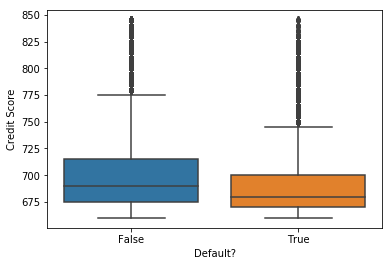

In [9]:
#credit score is usually a good predictor of loan default.
ax = sns.boxplot(x='default', y='fico_range_low', data=newdf)
ax.set(xlabel='Default?', ylabel='Credit Score')
plt.show()

There's definitely correlation between credit score and default rate but not near as much as I expected. 

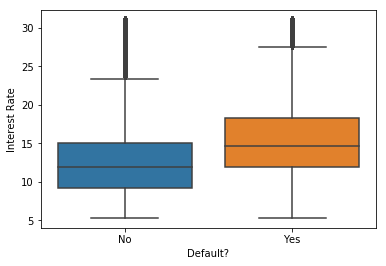

In [15]:
#interest rate could also be a good predictor of default
ax = sns.boxplot(x='default', y='int_rate', data=newdf)
ax.set(xlabel='Default?', ylabel='Interest Rate')
plt.show()

Interest rate seems like a much better predictor of default

In [16]:
#I have so many columns and such large numbers thats it hard to get a lot out of .describe()
newdf.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,mths_since_last_delinq,open_acc,pub_rec,total_acc,collections_12_mths_ex_med,tot_coll_amt,all_util
count,1.299081e+06,1.299081e+06,1.299081e+06,1.299081e+06,1.298502e+06,1.299081e+06,1.299081e+06,667611.000000,1.299081e+06,1.299081e+06,1.299081e+06,1.299081e+06,1.299081e+06,899207.000000
mean,1.493605e+04,1.296742e+01,4.428168e+02,7.888468e+04,1.907914e+01,3.444420e-01,6.964975e+02,33.912954,1.181119e+01,2.348160e-01,2.442530e+01,2.157525e-02,2.521861e+02,58.653578
std,9.087315e+03,4.841806e+00,2.670485e+02,1.341474e+05,1.293441e+01,9.305058e-01,3.211290e+01,21.928243,5.731426e+00,6.425534e-01,1.202707e+01,1.646540e-01,2.290311e+03,20.658546
min,1.000000e+03,5.320000e+00,7.610000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.600000e+02,0.000000,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000e+03,9.440000e+00,2.501000e+02,4.700000e+04,1.228000e+01,0.000000e+00,6.700000e+02,15.000000,8.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,45.000000
50%,1.280000e+04,1.259000e+01,3.754300e+02,6.500000e+04,1.827000e+01,0.000000e+00,6.900000e+02,31.000000,1.100000e+01,0.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,60.000000
75%,2.000000e+04,1.559000e+01,5.876900e+02,9.500000e+04,2.498000e+01,0.000000e+00,7.100000e+02,49.000000,1.500000e+01,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,73.000000
max,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,4.200000e+01,8.450000e+02,202.000000,9.700000e+01,8.600000e+01,1.760000e+02,2.000000e+01,9.324610e+05,211.000000


In [14]:
#I'm going to use .corr() but filter it so it is easier to see  possible correlations. I chose .1 as my threshold.
corr = newdf.corr()

In [15]:
corr[abs(corr[['default','loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
          'fico_range_low', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'total_acc',
          'collections_12_mths_ex_med', 'tot_coll_amt', 'all_util']]) > .1]

,default,loan_amnt,dti,fico_range_low,int_rate,installment,emp_length,annual_inc,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,total_acc,collections_12_mths_ex_med,tot_coll_amt,all_util
default,1.000000,NaN,NaN,-0.118961,0.219926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,1.000000,NaN,0.110097,0.132510,0.944965,NaN,0.168573,NaN,NaN,0.175548,NaN,0.202591,NaN,NaN,NaN
dti,NaN,NaN,1.000000,NaN,0.170988,NaN,NaN,NaN,NaN,NaN,0.245311,NaN,0.201067,NaN,NaN,0.165235
fico_range_low,-0.118961,0.110097,NaN,1.000000,-0.377330,NaN,NaN,NaN,-0.178639,0.102602,NaN,-0.18635,NaN,NaN,NaN,-0.417956
int_rate,0.219926,0.132510,0.170988,-0.377330,1.000000,0.159603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.264980
installment,NaN,0.944965,NaN,NaN,0.159603,1.000000,NaN,0.160645,NaN,NaN,0.163217,NaN,0.177156,NaN,NaN,NaN
emp_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,NaN,0.168573,NaN,NaN,NaN,0.160645,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delinq_2yrs,NaN,NaN,NaN,-0.178639,NaN,NaN,NaN,NaN,1.000000,-0.548242,NaN,NaN,0.115902,NaN,NaN,NaN
mths_since_last_delinq,NaN,NaN,NaN,0.102602,NaN,NaN,NaN,NaN,-0.548242,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


Default is correlated with both interest rate and credit score as we would expect. 

Loan amount has a large correlation with the monthly payment which is expected. Minor correllations with total number of accounts. 

Interest rate has a strong negative correlation with credit score and a positive correllation with balance to credit limits. Since balance to credit also affects credit score, this is expected.

In [10]:
#we're going to use datetime to reformat our issue dates. 
newdf['week_of_year'] = pd.to_datetime(newdf['issue_d']).dt.week
newdf['year'] = pd.to_datetime(newdf['issue_d']).dt.year
newdf['new_issue_d'] = newdf['week_of_year'] + (52* (newdf['year'] - newdf['year'].min()))
newdf['loan_month'] = pd.to_datetime(newdf['issue_d']).dt.month

C:\Users\hunte\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hunte\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hunte\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [60]:
newdf['new_issue_d'][newdf.default==1].value_counts()

61     10595
27      8300
40      8188
49      8137
57      6734
44      6540
14      6509
1       6458
31      6339
65      6174
18      5882
83      5822
78      5781
105     5462
23      5294
36      5180
74      5040
100     4832
9       4779
69      4741
96      4612
91      4256
87      4203
5       4198
113     3904
122     3868
156     3720
126     3604
130     3601
135     3547
139     3350
109     3127
117     3119
143     2649
148     2532
152     2148
Name: new_issue_d, dtype: int64

In [ ]:
newdf[newdf['new_issue_d']==61]

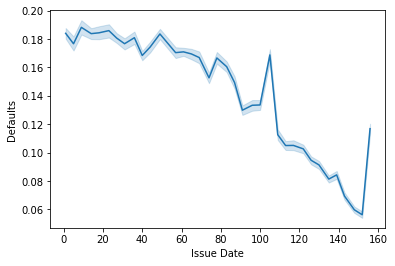

In [49]:
ax=sns.lineplot(x='new_issue_d', y='default', data=newdf)
ax.set(ylabel='Defaults', xlabel='Issue Date')
plt.show()

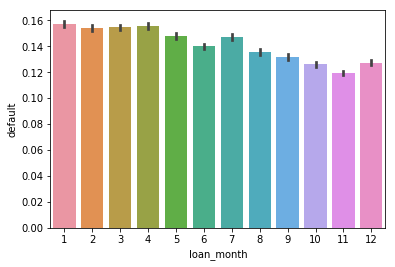

In [16]:
sns.barplot(x='loan_month', y='default', data=newdf)

In [20]:
#sns.swarmplot(x='loan_quality', y='loan_amnt', data = newdf)

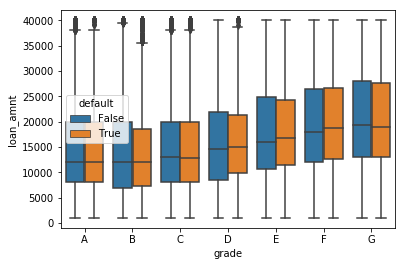

In [50]:
sns.boxplot(x='grade', y='loan_amnt', data=newdf, hue='default', order=['A', 'B','C','D','E','F','G'])

In [66]:
newdf['dti'].value_counts()

 18.00     893
 19.20     884
 16.80     861
 14.40     861
 15.60     856
 21.60     827
 13.20     820
 12.00     807
 20.40     800
 10.80     766
 22.80     751
 18.72     722
 17.28     716
 24.00     707
 14.64     702
 13.68     700
 17.52     700
 13.92     700
 16.32     700
 14.88     698
 18.48     692
 19.92     688
 20.88     674
 16.08     671
 16.56     671
 15.36     667
 16.20     667
 17.76     663
 16.40     660
 15.12     656
 26.40     652
 14.16     648
 13.44     648
 15.84     646
 19.44     646
 18.24     645
 15.00     645
 12.48     645
 17.04     644
 19.68     643
 20.00     641
 17.40     639
 18.60     639
 18.96     637
 9.60      636
 20.16     634
 12.96     634
 17.73     631
 18.80     631
 19.80     631
 21.12     630
 11.52     627
 12.24     622
 12.72     619
 17.70     619
 13.80     616
 14.86     614
 15.92     613
 17.94     612
 16.88     612
 16.13     609
 15.58     609
 21.00     609
 25.20     608
 11.76     608
 21.36     607
 17.56    

In [33]:
newdf['term'].value_counts(normalize=True)

 36 months    0.713648
 60 months    0.286352
Name: term, dtype: float64

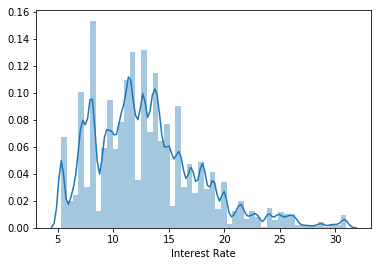

In [24]:
ax = sns.distplot(newdf['int_rate'])
ax.set(xlabel='Interest Rate')
plt.show()

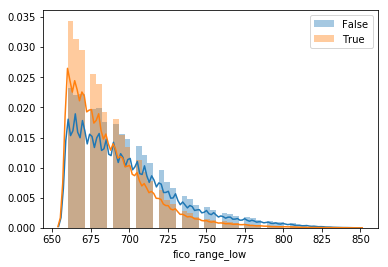

In [69]:
fig, ax = plt.subplots(1)
for t in newdf['default'].unique():
    sns.distplot(newdf[newdf['default']==t]['fico_range_low'], label=t)
ax.legend()

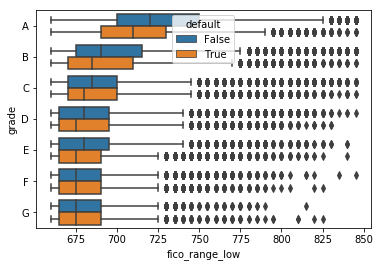

In [51]:
ax = sns.boxplot(x='fico_range_low', y='grade', data=newdf, hue='default', order=['A', 'B','C','D','E','F','G'])

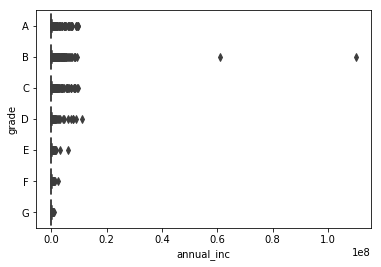

In [27]:
ax = sns.boxplot(x='annual_inc', y='grade', data=newdf, order=['A', 'B','C','D','E','F','G'])

In [28]:
test = newdf.groupby('emp_length')

In [29]:
test.head()

,default,loan_amnt,dti,fico_range_low,term,int_rate,grade,installment,emp_length,annual_inc,loan_status,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,total_acc,collections_12_mths_ex_med,tot_coll_amt,all_util,issue_d
id,,,,,,,,,,,,,,,,,,,,
68407277,False,3600.0,5.91,675.0,36 months,13.99,C,123.03,10,55000.0,Fully Paid,0.0,30.0,7.0,0.0,13.0,0.0,722.0,34.0,2015-12-01
68355089,False,24700.0,16.06,715.0,36 months,11.99,C,820.28,10,65000.0,Fully Paid,1.0,6.0,22.0,0.0,38.0,0.0,0.0,29.0,2015-12-01
68341763,False,20000.0,10.78,695.0,60 months,10.78,B,432.66,10,63000.0,Fully Paid,0.0,NaN,6.0,0.0,18.0,0.0,0.0,65.0,2015-12-01
66310712,False,35000.0,17.06,785.0,60 months,14.85,C,829.90,10,110000.0,Current,0.0,NaN,13.0,0.0,17.0,0.0,0.0,45.0,2015-12-01
68476807,False,10400.0,25.37,695.0,60 months,22.45,F,289.91,3,104433.0,Fully Paid,1.0,12.0,12.0,0.0,35.0,0.0,0.0,78.0,2015-12-01
68426831,False,11950.0,10.20,690.0,36 months,13.44,C,405.18,4,34000.0,Fully Paid,0.0,NaN,5.0,0.0,6.0,0.0,0.0,76.0,2015-12-01
68476668,False,20000.0,14.67,680.0,36 months,9.17,B,637.58,10,180000.0,Fully Paid,0.0,49.0,12.0,0.0,27.0,0.0,0.0,74.0,2015-12-01
68466926,False,10000.0,13.07,685.0,36 months,6.49,A,306.45,6,85000.0,Fully Paid,0.0,NaN,14.0,1.0,23.0,0.0,8341.0,46.0,2015-12-01
68356421,False,22400.0,22.98,710.0,60 months,12.88,C,508.30,6,95000.0,Current,0.0,54.0,16.0,0.0,35.0,0.0,0.0,54.0,2015-12-01


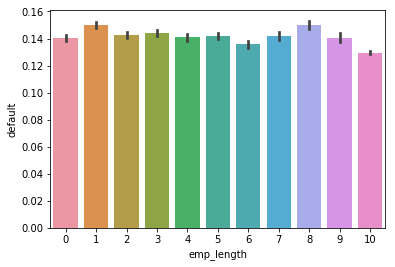

In [26]:
ax = sns.barplot(x='emp_length', y='default', data=newdf)

In [6]:
newdf['emp_length'].value_counts()

10+ years    437550
2 years      117554
< 1 year     110093
3 years      103526
1 year        85614
5 years       78065
4 years       77319
6 years       54537
8 years       53490
9 years       48882
7 years       48549
Name: emp_length, dtype: int64

In [19]:
cols

['member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joi

NameError: name 'cols' is not defined

10    437550
2     117554
<     110093
3     103526
1      85614
5      78065
4      77319
6      54537
8      53490
9      48882
7      48549
Name: new_emp, dtype: int64

In [65]:
newdf['new_emp'].value_counts()

10    437550
2     117554
<     110093
3     103526
1      85614
5      78065
4      77319
6      54537
8      53490
9      48882
7      48549
Name: new_emp, dtype: int64

In [35]:
newdf.head()

,default,loan_amnt,dti,fico_range_low,term,int_rate,grade,installment,emp_length,annual_inc,loan_status,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,total_acc,collections_12_mths_ex_med,tot_coll_amt,all_util,issue_d,week_of_year,year,new_issue_d,loan_month,new_emp
id,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,False,3600.0,5.91,675.0,36 months,13.99,C,123.03,10+ years,55000.0,Fully Paid,0.0,30.0,7.0,0.0,13.0,0.0,722.0,34.0,2015-12-01,49,2015,49,12,None
68355089,False,24700.0,16.06,715.0,36 months,11.99,C,820.28,10+ years,65000.0,Fully Paid,1.0,6.0,22.0,0.0,38.0,0.0,0.0,29.0,2015-12-01,49,2015,49,12,None
68341763,False,20000.0,10.78,695.0,60 months,10.78,B,432.66,10+ years,63000.0,Fully Paid,0.0,NaN,6.0,0.0,18.0,0.0,0.0,65.0,2015-12-01,49,2015,49,12,None
66310712,False,35000.0,17.06,785.0,60 months,14.85,C,829.90,10+ years,110000.0,Current,0.0,NaN,13.0,0.0,17.0,0.0,0.0,45.0,2015-12-01,49,2015,49,12,None
68476807,False,10400.0,25.37,695.0,60 months,22.45,F,289.91,3 years,104433.0,Fully Paid,1.0,12.0,12.0,0.0,35.0,0.0,0.0,78.0,2015-12-01,49,2015,49,12,None


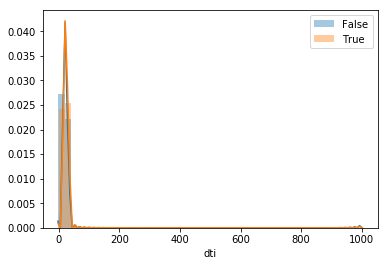

In [80]:
fig, ax = plt.subplots(1)
for t in newdf['default'].unique():
    sns.distplot(newdf[newdf['default']==t]['dti'], label=t)
ax.legend()

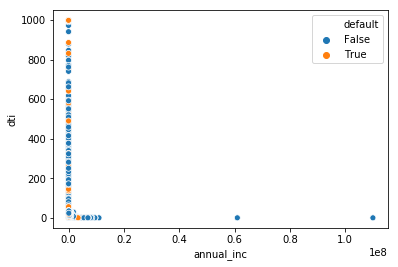

In [84]:
sns.scatterplot(x='annual_inc', y='dti', hue='default', data=newdf)

6.000000e+04    50275
5.000000e+04    43878
6.500000e+04    37515
7.000000e+04    35956
8.000000e+04    34686
7.500000e+04    33963
4.000000e+04    33805
4.500000e+04    31207
5.500000e+04    29556
1.000000e+05    27231
9.000000e+04    25934
8.500000e+04    23924
1.200000e+05    21838
3.500000e+04    20622
3.000000e+04    19311
1.100000e+05    17976
5.200000e+04    17211
4.200000e+04    15234
4.800000e+04    15222
1.500000e+05    14150
7.200000e+04    14055
9.500000e+04    13900
1.250000e+05    11696
6.200000e+04    11274
1.300000e+05    11002
3.600000e+04    10382
1.050000e+05    10084
3.800000e+04     9786
3.200000e+04     9608
5.800000e+04     9410
6.800000e+04     9177
5.400000e+04     9127
5.600000e+04     9096
2.500000e+04     9029
1.400000e+05     8947
1.150000e+05     8153
7.800000e+04     8017
4.300000e+04     7548
5.300000e+04     7543
6.300000e+04     6862
4.600000e+04     6790
8.200000e+04     6525
4.700000e+04     6239
5.700000e+04     6088
6.700000e+04     5936
2.000000e+

C:\Users\hunte\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
newdf['dti'].isnull().sum()

0

In [12]:
newdf['emp_length'].apply(experience_convert)

TypeError: argument of type 'float' is not iterable

In [30]:
newdf['emp_length'].head()

id
68407277    10+ years
68355089    10+ years
68341763    10+ years
66310712    10+ years
68476807      3 years
Name: emp_length, dtype: object

In [17]:
def exp_conver(s):
    is_less = len(re.findall(r'<',s))
    if is_less:
        return 0
    else:
        return int(re.findall(r'\d+', s)[0])

In [16]:
newdf['emp_length'].value_counts()

10    437550
2     117554
0     110093
3     103526
1      85614
5      78065
4      77319
6      54537
8      53490
9      48882
7      48549
Name: emp_length, dtype: int64

TypeError: expected string or bytes-like object

(1299081, 20)

(432407, 20)

[10,
 10,
 10,
 10,
 3,
 4,
 10,
 10,
 6,
 10,
 6,
 1,
 3,
 7,
 10,
 8,
 10,
 10,
 5,
 8,
 10,
 10,
 2,
 2,
 10,
 5,
 9,
 0,
 0,
 10,
 10,
 4,
 1,
 9,
 10,
 10,
 0,
 10,
 10,
 6,
 5,
 2,
 9,
 5,
 0,
 2,
 0,
 10,
 2,
 10,
 10,
 10,
 6,
 10,
 4,
 10,
 10,
 10,
 2,
 1,
 0,
 10,
 7,
 10,
 2,
 5,
 2,
 10,
 0,
 10,
 9,
 10,
 10,
 2,
 1,
 2,
 4,
 10,
 10,
 3,
 6,
 2,
 10,
 10,
 1,
 0,
 10,
 6,
 1,
 10,
 6,
 4,
 0,
 3,
 5,
 0,
 9,
 4,
 6,
 5,
 8,
 10,
 2,
 8,
 10,
 2,
 3,
 4,
 10,
 10,
 3,
 4,
 2,
 2,
 8,
 10,
 2,
 3,
 10,
 0,
 10,
 10,
 4,
 9,
 8,
 3,
 0,
 2,
 0,
 6,
 10,
 10,
 10,
 10,
 0,
 2,
 2,
 1,
 10,
 10,
 1,
 3,
 10,
 5,
 10,
 10,
 2,
 10,
 10,
 0,
 9,
 2,
 3,
 10,
 1,
 1,
 8,
 9,
 1,
 8,
 3,
 9,
 5,
 10,
 0,
 10,
 4,
 5,
 1,
 1,
 10,
 2,
 10,
 8,
 2,
 1,
 1,
 4,
 8,
 6,
 10,
 0,
 10,
 1,
 10,
 10,
 2,
 10,
 0,
 8,
 8,
 8,
 4,
 3,
 2,
 9,
 3,
 7,
 2,
 10,
 10,
 10,
 5,
 10,
 10,
 2,
 8,
 10,
 5,
 8,
 10,
 3,
 2,
 10,
 10,
 2,
 7,
 9,
 10,
 10,
 2,
 1,
 10,
 10,
 10,
 3,
 10,
 10,
 8,
